In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/food_crises_cleaned_with_market_details.csv', parse_dates=['date'])

In [3]:
df.head(2)

,country,district_code,district,centx,centy,year_month,year,month,ipc,ha,...,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,South Sudan,74,Bor,32.00486,6.465644,2007_01,2007,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,South Sudan,74,Bor,32.00486,6.465644,2007_02,2007,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
pivot_df = df.pivot_table(index=['date', 'district'], columns='commodity', values='usdprice', aggfunc='sum', fill_value=0).reset_index()
pivot_df = pivot_df.drop(['Exchange rate', 'Exchange rate (unofficial)'], axis=1)

# Merge the aggregated columns back to the original DataFrame
df = df.merge(pivot_df, on=['date', 'district'], how='left')
df = df.dropna(subset=['ipc'])

In [5]:
df.columns

Index(['country', 'district_code', 'district', 'centx', 'centy', 'year_month',
       'year', 'month', 'ipc', 'ha', 'ndvi_mean', 'ndvi_anom', 'rain_mean',
       'rain_anom', 'et_mean', 'et_anom', 'count_violence', 'sum_fatalities',
       'food_price_idx', 'area', 'cropland_pct', 'pop', 'ruggedness_mean',
       'pasture_pct', 'date', 'Closest_Market', 'admin1', 'admin2', 'market',
       'latitude', 'longitude', 'category', 'commodity', 'unit', 'priceflag',
       'pricetype', 'currency', 'price', 'usdprice', 'Beans (red)', 'Cassava',
       'Cassava (dry)', 'Fuel (diesel)', 'Fuel (diesel, parallel market)',
       'Fuel (petrol-gasoline)', 'Fuel (petrol-gasoline, parallel market)',
       'Groundnuts (shelled)', 'Livestock (goat, medium-sized male)',
       'Livestock (sheep, medium-sized male)', 'Maize (white)', 'Maize meal',
       'Millet (white)', 'Milling cost (sorghum)', 'Oil (vegetable)', 'Rice',
       'Salt', 'Sesame', 'Sorghum (local)', 'Sorghum (white, imported)',
       

C:\Users\pthie\AppData\Local\Temp\ipykernel_12100\1875392508.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bor_df['date'] = pd.to_datetime(bor_df['date'])


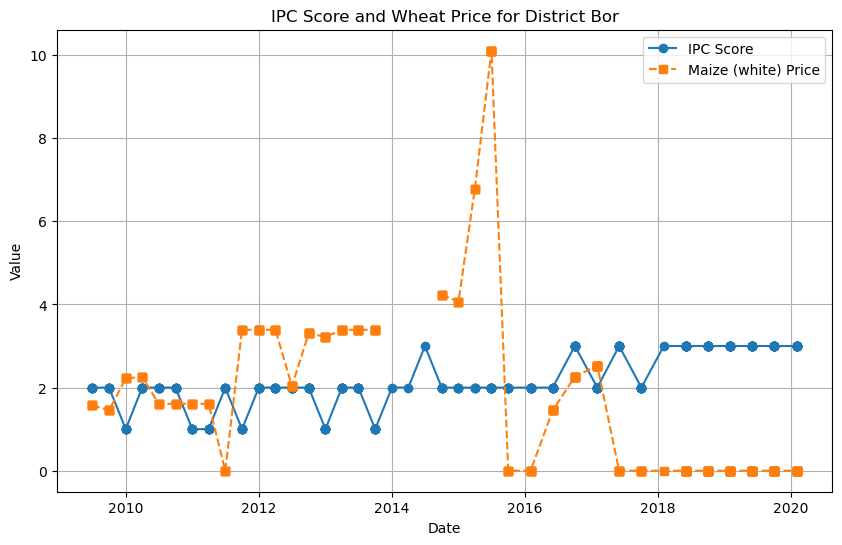

In [6]:
# Filter the DataFrame for district 'Bor'
bor_df = df[df['district'] == 'Bor']

# Set the 'date' column as the index (if it's not already)
bor_df['date'] = pd.to_datetime(bor_df['date'])
bor_df.set_index('date', inplace=True)

# Plot IPC score and wheat price
plt.figure(figsize=(10, 6))
plt.plot(bor_df.index, bor_df['ipc'], label='IPC Score', marker='o', linestyle='-')
plt.plot(bor_df.index, bor_df['Maize (white)'], label='Maize (white) Price', marker='s', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('IPC Score and Wheat Price for District Bor')
plt.legend()
plt.grid(True)

plt.show()


In [7]:
df['sum_usdprice'] = df.groupby(['date', 'district','commodity'])['usdprice'].transform('sum')

In [8]:
df.commodity.unique()

array(['Maize (white)', 'Sorghum (white, imported)', 'Wheat flour',
       'Beans (red)', 'Groundnuts (shelled)', 'Fuel (diesel)',
       'Fuel (petrol-gasoline)', 'Oil (vegetable)', nan, 'Sesame',
       'Exchange rate', 'Exchange rate (unofficial)', 'Rice',
       'Sorghum (local)', 'Livestock (goat, medium-sized male)',
       'Livestock (sheep, medium-sized male)', 'Sugar (brown, imported)',
       'Milling cost (sorghum)',
       'Wage (non-qualified labour, non-agricultural)', 'Salt',
       'Maize meal', 'Cassava (dry)', 'Millet (white)', 'Cassava',
       'Fuel (diesel, parallel market)',
       'Fuel (petrol-gasoline, parallel market)'], dtype=object)

In [9]:
df.columns.unique()

Index(['country', 'district_code', 'district', 'centx', 'centy', 'year_month',
       'year', 'month', 'ipc', 'ha', 'ndvi_mean', 'ndvi_anom', 'rain_mean',
       'rain_anom', 'et_mean', 'et_anom', 'count_violence', 'sum_fatalities',
       'food_price_idx', 'area', 'cropland_pct', 'pop', 'ruggedness_mean',
       'pasture_pct', 'date', 'Closest_Market', 'admin1', 'admin2', 'market',
       'latitude', 'longitude', 'category', 'commodity', 'unit', 'priceflag',
       'pricetype', 'currency', 'price', 'usdprice', 'Beans (red)', 'Cassava',
       'Cassava (dry)', 'Fuel (diesel)', 'Fuel (diesel, parallel market)',
       'Fuel (petrol-gasoline)', 'Fuel (petrol-gasoline, parallel market)',
       'Groundnuts (shelled)', 'Livestock (goat, medium-sized male)',
       'Livestock (sheep, medium-sized male)', 'Maize (white)', 'Maize meal',
       'Millet (white)', 'Milling cost (sorghum)', 'Oil (vegetable)', 'Rice',
       'Salt', 'Sesame', 'Sorghum (local)', 'Sorghum (white, imported)',
       

In [10]:
df

,country,district_code,district,centx,centy,year_month,year,month,ipc,ha,...,Oil (vegetable),Rice,Salt,Sesame,Sorghum (local),"Sorghum (white, imported)","Sugar (brown, imported)","Wage (non-qualified labour, non-agricultural)",Wheat flour,sum_usdprice
57,South Sudan,74,Bor,32.00486,6.465644,2009_07,2009,7,2.0,NaN,...,0.0000,0.0000,0.0000,0.0,0.0,2.6165,0.0000,0.0000,0.9661,1.5779
58,South Sudan,74,Bor,32.00486,6.465644,2009_07,2009,7,2.0,NaN,...,0.0000,0.0000,0.0000,0.0,0.0,2.6165,0.0000,0.0000,0.9661,2.6165
59,South Sudan,74,Bor,32.00486,6.465644,2009_07,2009,7,2.0,NaN,...,0.0000,0.0000,0.0000,0.0,0.0,2.6165,0.0000,0.0000,0.9661,0.9661
60,South Sudan,74,Bor,32.00486,6.465644,2009_07,2009,7,2.0,NaN,...,0.0000,0.0000,0.0000,0.0,0.0,2.6165,0.0000,0.0000,0.9661,2.5762
61,South Sudan,74,Bor,32.00486,6.465644,2009_07,2009,7,2.0,NaN,...,0.0000,0.0000,0.0000,0.0,0.0,2.6165,0.0000,0.0000,0.9661,3.8644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46580,South Sudan,151,Malakal,31.64280,9.658457,2020_02,2020,2,4.0,0.0,...,6.1962,3.0981,2.4785,0.0,0.0,74.3544,3.0981,3.0981,3.0981,6.1962
46581,South Sudan,151,Malakal,31.64280,9.658457,2020_02,2020,2,4.0,0.0,...,6.1962,3.0981,2.4785,0.0,0.0,74.3544,3.0981,3.0981,3.0981,0.9294
46582,South Sudan,151,Malakal,31.64280,9.658457,2020_02,2020,2,4.0,0.0,...,6.1962,3.0981,2.4785,0.0,0.0,74.3544,3.0981,3.0981,3.0981,3.0981
46583,South Sudan,151,Malakal,31.64280,9.658457,2020_02,2020,2,4.0,0.0,...,6.1962,3.0981,2.4785,0.0,0.0,74.3544,3.0981,3.0981,3.0981,6.1962
